# Describing Data

### What do you find in this notebook?

In this exercise, first, you will familiarize yourself with the Python libraries 'statsmodels' and 'SciPy' that let you do statistical analysis: calculate descriptive statistics, sample datapoints, study relationships between variables, and perform hypothesis testing. Then, second, you will work on a set of exercises that will let you practice your skills.

Here we show a couple of examples of how to do common analyses, but there are many more useful probability distributions and statistical tests. In the linked documentation, you will find complete information, and a lot more details compared to what is outlined in this notebook:
- [statsmodels](https://www.statsmodels.org/stable/examples/index.html), [more complete documentation](https://www.statsmodels.org/stable/stats.html)
- [SciPy](https://docs.scipy.org/doc/scipy/reference/stats.html)

# Tutorial: How to use the libraries

- You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Here we load it. Take some time to familiarize yourself with the contents. One row represents one county.

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats

In [2]:
data_folder = './data/'
df = pd.read_csv(data_folder + 'acs2015_county_data.csv')

In [3]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [4]:
df.sample(10)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1357,27087,Minnesota,Mahnomen,5496,2772,2724,2.9,47.8,0.5,39.2,...,4.9,0.7,4.5,20.7,2222,59.2,32.4,8.2,0.2,9.2
2852,51067,Virginia,Franklin,56315,27611,28704,2.7,87.0,8.4,0.1,...,3.1,1.2,5.2,29.8,25149,80.1,13.5,6.3,0.2,6.2
186,6001,California,Alameda,1584983,776699,808284,22.6,33.0,11.3,0.3,...,3.7,3.5,5.6,30.7,778132,78.7,13.8,7.4,0.1,8.3
1510,29055,Missouri,Crawford,24660,12170,12490,1.7,95.9,0.2,0.6,...,1.3,1.0,3.8,27.5,9393,79.6,11.8,8.4,0.2,12.7
1502,29039,Missouri,Cedar,13892,6918,6974,1.4,95.2,0.1,0.1,...,2.1,1.9,3.0,26.7,5029,73.5,16.2,9.6,0.7,10.5
1428,28055,Mississippi,Issaquena,1291,845,446,0.5,34.3,65.1,0.0,...,3.9,1.0,2.3,24.9,305,77.7,15.4,6.9,0.0,11.6
3172,72059,Puerto Rico,Guayanilla,20442,9844,10598,99.5,0.4,0.0,0.0,...,6.3,1.5,1.3,26.5,4603,63.0,30.0,7.0,0.0,22.5
1616,30037,Montana,Golden Valley,756,364,392,2.1,94.7,0.0,0.0,...,18.9,1.4,9.5,24.4,357,63.0,23.2,12.6,1.1,3.5
260,8031,Colorado,Denver,649654,324730,324924,30.9,53.1,9.4,0.6,...,4.5,3.4,6.5,24.8,348382,83.2,11.2,5.6,0.1,6.3
560,16019,Idaho,Bonneville,107788,53404,54384,12.4,84.1,0.4,0.4,...,1.7,2.0,4.0,18.8,47191,78.0,15.2,6.6,0.3,5.6


- We will focus first on income per capita across counties.

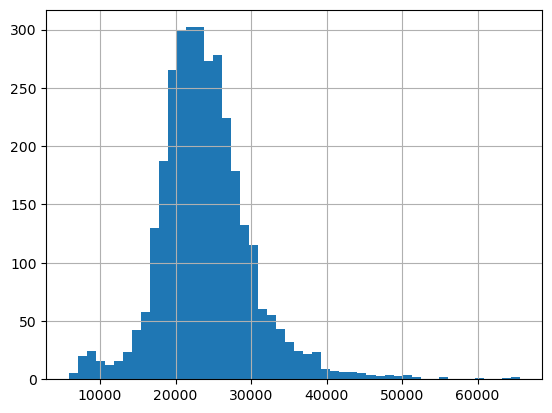

In [5]:
df['IncomePerCap'].hist(bins = 50)
plt.show()

### 1. Calculating descriptive statisctics

- Let's calculate basic descriptive statistics of the income per capita.

In [6]:
df['IncomePerCap'].describe()

count     3220.000000
mean     23981.771739
std       6204.339960
min       5878.000000
25%      20238.500000
50%      23460.000000
75%      27053.250000
max      65600.000000
Name: IncomePerCap, dtype: float64

- What distribution does the data come from? Here is how we can test the goodness of the fit.

In [7]:
# does the data come from a normal distrbution?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'norm')

(np.float64(0.0637621121184162), np.float64(0.0009999999999998899))

- p_value < 0.05 -> we can reject the null hypothesis that the data comes from a normal distribution!

In [8]:
#how about exponential?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'exp')

(np.float64(0.433243770582646), np.float64(0.0009999999999998899))

- p < 0.05 -> not exponential either!

### 2. How to sample the data

- Often we need to find random samples from the dataset. We can do so conveniently with pandas wrappers.

In [9]:
#make 10 samples with replacement
sample1_counties = df.sample(n = 10, replace = True)

#make 10 samples without replacement
sample1_counties = df.sample(n = 10, replace = False)

#sometimes we want to sample in an unbalance way, so that we upsample datapoints of certain characteristic,
#and downsample the others. this can be achieved with weights parameter
#here we sample by upsampling counties with large population
sample2_counties = df.sample(n = 10, replace = False, weights = df['TotalPop'])

In [10]:
#on avergage, the samples in the sample produce with reveighting now have higher population, as we wanted!
print(sample1_counties['TotalPop'].mean())
print(sample2_counties['TotalPop'].mean())

49408.4
1272475.2


### 3. Examining relationship between two variables

- Is income per capita of a county correlated with the unemployment?

In [11]:
stats.pearsonr(df['IncomePerCap'],df['Employed'])

PearsonRResult(statistic=np.float64(0.2646136320394489), pvalue=np.float64(9.942215354238876e-53))

- There is a small (test statistic = 0.26), but significant (p = 9.942215354238876e-53 < 0.05) positive correlation.

How these function work is that they return the p-value of seeing this amount of correlation without any correlation being there, since it's extremely small it means that it's extremely unlikely to see this amount of correlation without any correlation being there

Also if you square the test statistic (r) then that's the percentage of variance in Employed that can be explained by IncomePerCap (in this case its 7%)

In [12]:
stats.spearmanr(df['IncomePerCap'],df['Employed'])

SignificanceResult(statistic=np.float64(0.30770631560595474), pvalue=np.float64(1.415296431173735e-71))

- Spearman rank coorrelation is also significant.

### 4. Hypothesis testing

- Is income per capita higher in New York counties compared to California counties?

In [13]:
df.loc[df['State'] == 'New York']['IncomePerCap'].mean()

np.float64(28189.75806451613)

In [14]:
df.loc[df['State'] == 'California']['IncomePerCap'].mean()

np.float64(27902.603448275862)

- We see that there is a ~300$ gap. Quite a lot!
- But is it significantly higher? Let's use a t-test. This is a two-sided test for the null hypothesis that the two independent samples have identical average (expected) values. 

In [15]:
stats.ttest_ind(df.loc[df['State'] == 'New York']['IncomePerCap'], df.loc[df['State'] == 'California']['IncomePerCap'])

TtestResult(statistic=np.float64(0.19788117232375713), pvalue=np.float64(0.8434785239169611), df=np.float64(118.0))

- p is not smaller than 0.05 -> we cannot reject the null hypothesis that the income is the same -> there is no significant difference

### 5. How to measure uncertainty
- Now we see the importance of mesuring uncertainty and indicating it on data visualizations.
- Visual inspection of 95% confidence intervals lets us see that the difference is not significant (the errorbars are overlapping).

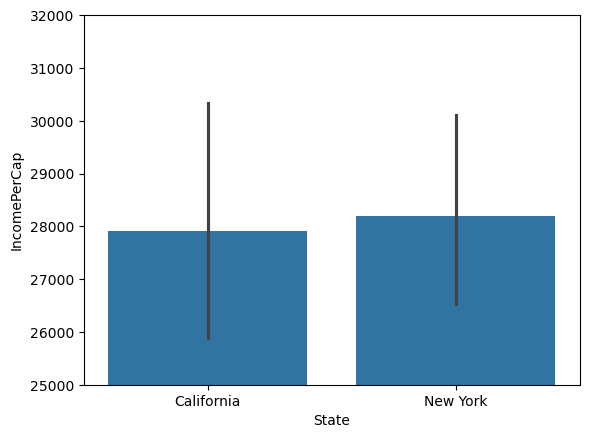

In [16]:
ax = sns.barplot(x="State", y="IncomePerCap", data=df.loc[df['State'].isin(['New York','California'])])
plt.ylim([25000,32000])
plt.show()

# Exercise 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

mean_income_high_se_ratio:  25066.32833020638
mean_income_low_se_ratio:  23766.636397469298

PearsonRResult(statistic=np.float64(0.08727386609551786), pvalue=np.float64(7.05286119652451e-07))
SignificanceResult(statistic=np.float64(0.056413673053189874), pvalue=np.float64(0.0013623847564714516))

PearsonRResult(statistic=np.float64(0.10271072384897646), pvalue=np.float64(5.172793857009208e-09))
SignificanceResult(statistic=np.float64(-0.17922176566889664), pvalue=np.float64(1.1946746758988442e-24))


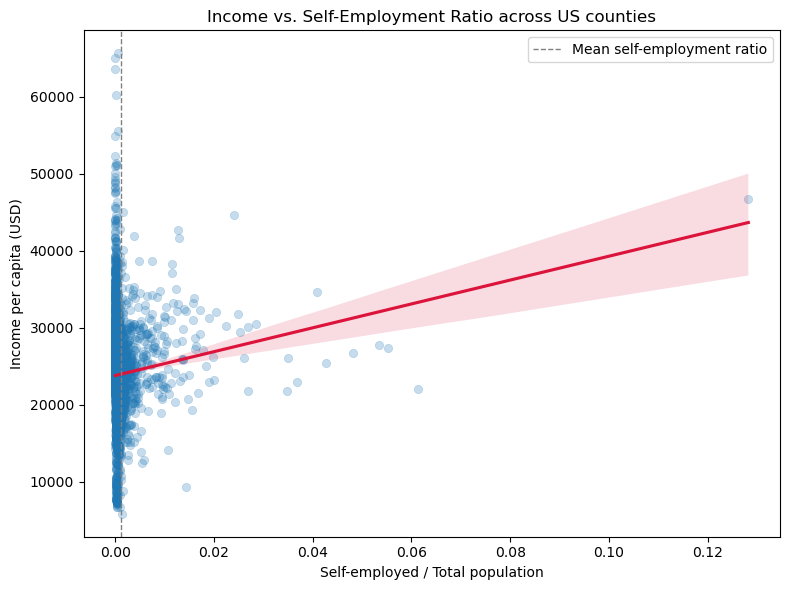

In [17]:
### your code and or answer here ###
se_df = pd.DataFrame({
    "County": df["County"],
    "IncomePerCap": df['IncomePerCap'],
    "SelfEmployedRatio": df["SelfEmployed"] / df["TotalPop"]
})
se_df_mean = se_df["SelfEmployedRatio"].mean()
mean_income_high_se_ratio = se_df[se_df["SelfEmployedRatio"] > se_df_mean]["IncomePerCap"].mean()
mean_income_low_se_ratio = se_df[se_df["SelfEmployedRatio"] <= se_df_mean]["IncomePerCap"].mean()
print("mean_income_high_se_ratio: ", mean_income_high_se_ratio)
print("mean_income_low_se_ratio: ", mean_income_low_se_ratio)

print()
# here we see that the counties with the highest income per cap have ratios of self employed people in the population way lower than the mean for all counties
# similarly we see that top 5 counties per income per cap that have a self employed ratio in the population above the average are significantly poorer
# anyway let's use normal tools to check for correlation

print(stats.pearsonr(df['IncomePerCap'],df['SelfEmployed']))
# the test statistic is pretty low (0.08), basically irrelevant
print(stats.spearmanr(df['IncomePerCap'],df['SelfEmployed']))
# the test statistic is pretty low (0.05), basically irrelevant

print()
# the strange thing is that when you do the comparisons based on the average SelfEmployedRatio
# you see that is makes a big difference, but when you compute the correlation you don't see the same effect,
# this is because since the correlation is being computed with absolute value of SelfEmployed people,
# the scale of it has a big weight in the calculation of the correlation. Let's now try by using the SelfEmployedRatio

print(stats.pearsonr(se_df['IncomePerCap'],se_df['SelfEmployedRatio']))
# the test statistic is low but present (0.10), the p-value is also very low so it means something is going on there
print(stats.spearmanr(se_df['IncomePerCap'],se_df['SelfEmployedRatio']))
# the test statistic is negative (-0.18, proportionally inverse), irrelevant

# in this case the weird thing is that pearson's correlation says that there is positive correlation
# spearman says the opposite, meaning that when you order counties by self-employment ratio,
# their income tends to go up as you go down the list => counties with very low or high SelfEmployedRatio defy the
# linear trend found by Pearson's Correlation

plt.figure(figsize=(8, 6))
sns.scatterplot(data=se_df, x="SelfEmployedRatio", y="IncomePerCap", alpha=0.25, edgecolor=None)
sns.regplot(data=se_df, x="SelfEmployedRatio", y="IncomePerCap", scatter=False, color="crimson", line_kws={"label": "OLS fit"})
plt.axvline(se_df_mean, color="gray", linestyle="--", linewidth=1, label="Mean self-employment ratio")
plt.title("Income vs. Self-Employment Ratio across US counties")
plt.xlabel("Self-employed / Total population")
plt.ylabel("Income per capita (USD)")
plt.legend()
plt.tight_layout()
plt.show()

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

mean_income_high_se_ratio:  24057.727272727272
mean_income_low_se_ratio:  25292.338983050846
mean_income_high_se_ratio - mean_income_low_se_ratio:  -1234.6117103235738

PearsonRResult(statistic=np.float64(-0.09434747393091536), pvalue=np.float64(0.13372282998084656))
SignificanceResult(statistic=np.float64(-0.3025062670865867), pvalue=np.float64(8.970815243069298e-07))


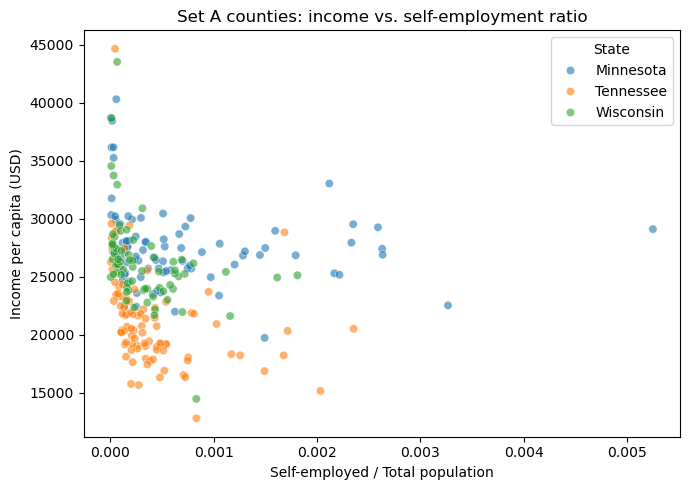

In [18]:
### your code and or answer here ###
set_A = ["Wisconsin", "Tennessee", "Minnesota"]
filtered_df = df[df["State"].isin(set_A)]
se_df = pd.DataFrame({
    "State": filtered_df["State"],
    "County": filtered_df["County"],
    "IncomePerCap": filtered_df['IncomePerCap'],
    "SelfEmployedRatio": filtered_df["SelfEmployed"] / filtered_df["TotalPop"]
})
se_df_mean = se_df["SelfEmployedRatio"].mean()
mean_income_high_se_ratio = se_df[se_df["SelfEmployedRatio"] > se_df_mean]["IncomePerCap"].mean()
mean_income_low_se_ratio = se_df[se_df["SelfEmployedRatio"] <= se_df_mean]["IncomePerCap"].mean()
print("mean_income_high_se_ratio: ", mean_income_high_se_ratio)
print("mean_income_low_se_ratio: ", mean_income_low_se_ratio)
print("mean_income_high_se_ratio - mean_income_low_se_ratio: ", mean_income_high_se_ratio - mean_income_low_se_ratio)

print()

print(stats.pearsonr(se_df['IncomePerCap'],se_df['SelfEmployedRatio']))
# the test statistic is negative (-0.09, proportionally inverse), p-value is too high so this is not relevant
print(stats.spearmanr(se_df['IncomePerCap'],se_df['SelfEmployedRatio']))
# the test statistic is negative (-0.30, proportionally inverse), p-value is very low it could actually mean something

plt.figure(figsize=(7, 5))
sns.scatterplot(data=se_df, x="SelfEmployedRatio", y="IncomePerCap", hue="State", alpha=0.6)
plt.title("Set A counties: income vs. self-employment ratio")
plt.xlabel("Self-employed / Total population")
plt.ylabel("Income per capita (USD)")
plt.legend(title="State")
plt.tight_layout()
plt.show()

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

Minnesota
high_se_ratio_income:  26911.296296296296
low_se_ratio_income:  27925.033333333333
high_se_ratio_income - low_se_ratio_income:  -1013.7370370370372
(np.float64(-0.14564887430565035), np.float64(0.17828214490362418))
(np.float64(-0.2593782322064916), np.float64(0.01526620192908083))

Tennessee
high_se_ratio_income:  19299.483870967742
low_se_ratio_income:  22480.40625
high_se_ratio_income - low_se_ratio_income:  -3180.9223790322576
(np.float64(-0.33184492849501046), np.float64(0.00101901954914281))
(np.float64(-0.6127659574468085), np.float64(4.118796352020322e-11))

Wisconsin
high_se_ratio_income:  24095.0
low_se_ratio_income:  27544.155555555557
high_se_ratio_income - low_se_ratio_income:  -3449.155555555557
(np.float64(-0.39079939825516163), np.float64(0.0006886597812191945))
(np.float64(-0.5908740111904304), np.float64(4.655664625509134e-08))



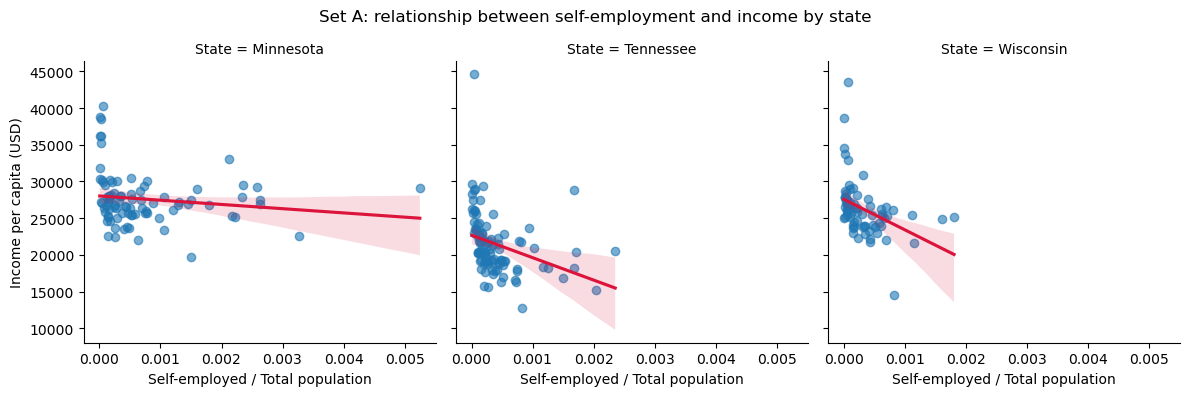

In [19]:
### your code and or answer here ###
for state, group in se_df.groupby("State"):
    se_ratio_mean = group["SelfEmployedRatio"].mean()
    high_se_ratio_income = group.loc[group["SelfEmployedRatio"] > se_ratio_mean, "IncomePerCap"].mean()
    low_se_ratio_income = group.loc[group["SelfEmployedRatio"] <= se_ratio_mean, "IncomePerCap"].mean()

    pearson_r, pearson_p = stats.pearsonr(group["IncomePerCap"], group["SelfEmployedRatio"])
    spearman_r, spearman_p = stats.spearmanr(group["IncomePerCap"], group["SelfEmployedRatio"])

    print(state)
    print("high_se_ratio_income: ", high_se_ratio_income)
    print("low_se_ratio_income: ", low_se_ratio_income)
    print("high_se_ratio_income - low_se_ratio_income: ", high_se_ratio_income - low_se_ratio_income)
    print((pearson_r, pearson_p))
    print((spearman_r, spearman_p))
    print()

g = sns.lmplot(
    data=se_df,
    x="SelfEmployedRatio",
    y="IncomePerCap",
    col="State",
    height=4,
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "crimson"}
)
g.set_axis_labels("Self-employed / Total population", "Income per capita (USD)")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Set A: relationship between self-employment and income by state")
plt.show()

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning. Hint: It is useful to add a notion of confidence to your results and explore the data visually.

mean_income_high_se_ratio:  25643.977777777778
mean_income_low_se_ratio:  27932.779069767443
mean_income_high_se_ratio - mean_income_low_se_ratio:  -2288.8012919896646

PearsonRResult(statistic=np.float64(-0.1478626607983814), pvalue=np.float64(0.09190694254909712))
SignificanceResult(statistic=np.float64(-0.27957614904179795), pvalue=np.float64(0.0012208359384435605))


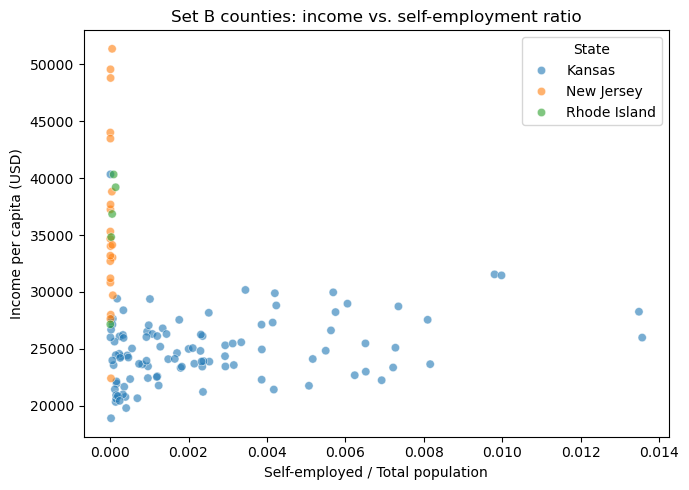

Kansas
high_se_ratio_income:  25923.485714285714
low_se_ratio_income:  24467.82857142857
high_se_ratio_income - low_se_ratio_income:  1455.6571428571442
(np.float64(0.27300823324099366), np.float64(0.004836127196539888))
(np.float64(0.2355898818162969), np.float64(0.015548796830997814))

New Jersey
high_se_ratio_income:  34909.333333333336
low_se_ratio_income:  36554.6
high_se_ratio_income - low_se_ratio_income:  -1645.2666666666628
(np.float64(-0.01759066311895366), np.float64(0.9396737062689944))
(np.float64(-0.04805194805194805), np.float64(0.8361372099212369))

Rhode Island
high_se_ratio_income:  39758.0
low_se_ratio_income:  32945.666666666664
high_se_ratio_income - low_se_ratio_income:  6812.333333333336
(np.float64(0.8091096922573295), np.float64(0.09719994177346221))
(np.float64(0.8999999999999998), np.float64(0.03738607346849874))



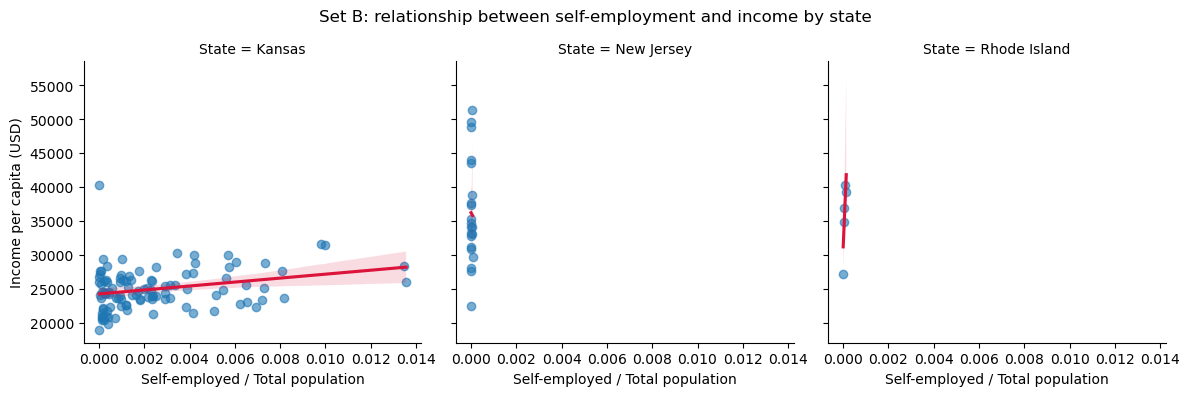

In [20]:
### your code and or answer here ###
set_B = ["New Jersey", "Kansas", "Rhode Island"]
filtered_df = df[df["State"].isin(set_B)]
se_df = pd.DataFrame({
    "State": filtered_df["State"],
    "County": filtered_df["County"],
    "IncomePerCap": filtered_df['IncomePerCap'],
    "SelfEmployedRatio": filtered_df["SelfEmployed"] / filtered_df["TotalPop"]
})
se_df_mean = se_df["SelfEmployedRatio"].mean()
mean_income_high_se_ratio = se_df[se_df["SelfEmployedRatio"] > se_df_mean]["IncomePerCap"].mean()
mean_income_low_se_ratio = se_df[se_df["SelfEmployedRatio"] <= se_df_mean]["IncomePerCap"].mean()
print("mean_income_high_se_ratio: ", mean_income_high_se_ratio)
print("mean_income_low_se_ratio: ", mean_income_low_se_ratio)
print("mean_income_high_se_ratio - mean_income_low_se_ratio: ", mean_income_high_se_ratio - mean_income_low_se_ratio)

print()

print(stats.pearsonr(se_df['IncomePerCap'],se_df['SelfEmployedRatio']))
# the test statistic is negative (-0.14, proportionally inverse), p-value is too high so this is not relevant
print(stats.spearmanr(se_df['IncomePerCap'],se_df['SelfEmployedRatio']))
# the test statistic is negative (-0.27, proportionally inverse), p-value is low but not too low so maybe it's relevant

plt.figure(figsize=(7, 5))
sns.scatterplot(data=se_df, x="SelfEmployedRatio", y="IncomePerCap", hue="State", alpha=0.6)
plt.title("Set B counties: income vs. self-employment ratio")
plt.xlabel("Self-employed / Total population")
plt.ylabel("Income per capita (USD)")
plt.legend(title="State")
plt.tight_layout()
plt.show()

for state, group in se_df.groupby("State"):
    se_ratio_mean = group["SelfEmployedRatio"].mean()
    high_se_ratio_income = group.loc[group["SelfEmployedRatio"] > se_ratio_mean, "IncomePerCap"].mean()
    low_se_ratio_income = group.loc[group["SelfEmployedRatio"] <= se_ratio_mean, "IncomePerCap"].mean()

    pearson_r, pearson_p = stats.pearsonr(group["IncomePerCap"], group["SelfEmployedRatio"])
    spearman_r, spearman_p = stats.spearmanr(group["IncomePerCap"], group["SelfEmployedRatio"])

    print(state)
    print("high_se_ratio_income: ", high_se_ratio_income)
    print("low_se_ratio_income: ", low_se_ratio_income)
    print("high_se_ratio_income - low_se_ratio_income: ", high_se_ratio_income - low_se_ratio_income)
    print((pearson_r, pearson_p))
    print((spearman_r, spearman_p))
    print()

g = sns.lmplot(
    data=se_df,
    x="SelfEmployedRatio",
    y="IncomePerCap",
    col="State",
    height=4,
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "crimson"}
)
g.set_axis_labels("Self-employed / Total population", "Income per capita (USD)")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Set B: relationship between self-employment and income by state")
plt.show()

# Exercise 2. Data visualization and read the stats comprehension and interpretation questions.

- As part of the quizes, two homeworks and the final exam, you will be at times asked to interpret your result based on the understanding of underlying concepts. The questions below can help you practice and get a sense of how well you understand the concepts covered in the class so far. Can you answer these questions confidently?

### Question 1. The yearly salaries (in thousands of CHF) of 7000 people are summarized in the following box plot. If the 20th percentile of the salaries is 110,000, how many people earn between 110,000 and 114,000?

- a) 2100
- b) 700
- c) 350
- d) 70

<img src="boxplot.png" style="width: 400px;" align="left"/>

In [21]:
### your code and or answer here ###
7000 * 5 / 100

350.0

### Question 2. What visualizations are suitable for getting insights about the distribution of a single continuous variable?

- a) Barplot and histogram
- b) Boxplot and histogram
- c) Scatterplot and boxplot
- d) Barplot, boxplot, and histogram

In [22]:
### your code and or answer here ###
# boxplot and histogram

### Question 3. In a new groundbreaking study, 28 out of 100 patients reported improvements after taking a new medicine. It is known that, when given a placebo, 20% of the patients report feeling better. What is the p-value assuming the null hypothesis that the probability of successful treatment in this groundbreaking study is the same as the probability of reporting feeling better under placebo, according to a one-sided binomial test? Hint: you may use the statsmodels.stats.proportion.binom_test function.

- a) 0.00034
- b) 0.0034
- c) 0.034
- d) 0.34

In [ ]:
### your code and or answer here ###
# Null hypothesis = probability of successful treatment with new medicine or placebo is the same according to a one-sided binomial test
# P-value of such Null hypothesis
from statsmodels.stats.proportion import binom_test

# testing what is the p-value of drawing 28 or more successful treatments under the hypothesis that 20% of patients get well by placebo
# the hypothesis here is that getting a placebo and the medicine leads to about the same results, since the p-value is 0.034 we can
# reject that hypothesis and say that the medicine treatments is likely to give better results
binom_test(28, n=100, p=0.2, alternative='larger')

AttributeError: module 'statsmodels.stats' has no attribute 'Binomial'

### Question 4. The 95% confidence interval of the average height of 1000 people using bootstrap resampling with 10000 bootstrap samples is calculated by:

- a) Sampling 1000 height values with replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 500th and the 9500th value in sorted order.
- b) Sampling 10000 height values without replacement and computing the mean. This is repeated 1000 times to create a sorted list of the 1000 means. The CI is defined by the 25th and the 975th value in sorted order.
- c) Sampling 1000 height values with replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 250th and the 9750th value in sorted order.
- d) Sampling 1000 height values without replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 500th and the 9500th value in sorted order.

### Implement your bootstrapping function that you will use in the rest of the course. It should take an array and the number of iterations as inputs, and output 95% confidence intervals of the mean.

In [36]:
### your code and or answer here ###
# c)
import numpy as np

MIN_HEIGHT = 1.5
MAX_HEIGHT = 2.0
N_SAMPLES = 1000

heights = np.random.uniform(MIN_HEIGHT, MAX_HEIGHT, N_SAMPLES)

def bootstrap_95_ci(data, n_iter):
    averages = []
    confidence = 0.95

    for _ in range(n_iter):
        sample = np.random.choice(data, size=N_SAMPLES, replace=True)
        averages.append(sample.mean())

    averages = sorted(averages)

    # so that the center of the confidence interval is at 50% quartile
    min = averages[math.floor(n_iter * (0.5 - (confidence / 2)))]
    max = averages[math.floor(n_iter * (0.5 + (confidence / 2)))]
    return min, max


N_ITER = 10000
bootstrap_95_ci(heights, N_ITER)

(np.float64(1.743338183816877), np.float64(1.761442545456287))

### Question 5. A study conducted at EPFL revealed a negative Spearman’s correlation between GPA and entry-level job salary. Which of the following statements is true?

- a) There could be a positive Spearman’s correlation between GPA and entry-level job salary in every single department of EPFL.
- b) Spearman correlation between GPA and entry-level job salary in every single department has to be positive.
- c) Across all levels, as opposed to entry-level only, higher GPA scores are associated with higher job salaries.
- d) We can infer that finishing EPFL with a higher GPA causes you to have a lower entry-level job salary.

In [ ]:
### your code and or answer here ###
# a)

### Question 6. The average number of requests per page during a day on a large website is 200, while the median is 15. 

- a) You can assume that the distribution is heavy-tailed.
- b) You are dealing with a left-skewed distribution.
- c) Half of the pages get more than 200 requests.
- d) None of the above.

In [ ]:
### your code and or answer here ###
# a)